Christopher Thornburg \\
DSA 501 \\
Title: W4T4 Kaggle API

# Instructions:  
Create an API in Kaggle. Then download one dataset and explore it.
# Submit:
Colab notebook KaggleAPI_lastname.ipynb

In [ ]:
!pip install kaggle

In [ ]:
import json
import pandas as pd
import numpy as np

!mkdir ~/.kaggle
!cp "/content/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Set the permissions

Using the Kaggle API to search for datasets about vehicle size

In [ ]:
!kaggle datasets list --search "vehicle size"

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
devsubhash/car-tyres-dataset                                Car Tyres Dataset                                   26KB  2021-12-12 19:32:00           1301         47  1.0              
benoit72/uk-accidents-10-years-history-with-many-variables  UK Accidents 10 years history with many variables  103MB  2018-03-03 23:47:12           5740         67  0.7647059        
toramky/automobile-dataset                                  Automobile Dataset                                   5KB  2017-05-24 04:45:13          55021        391  0.7352941        
imtkaggleteam/electric-vehicle-population                   Electric Vehicle Populati

The first result is just as good if any of the datasets were remotely close to what was searched.

In [ ]:
!kaggle datasets download -d devsubhash/car-tyres-dataset

  0% 0.00/26.0k [00:00<?, ?B/s]
100% 26.0k/26.0k [00:00<00:00, 44.1MB/s]


In [ ]:
!unzip car-tyres-dataset.zip

Archive:  car-tyres-dataset.zip
  inflating: Car_Tyres_Dataset.csv   


In [ ]:
import pandas as pd

# Use pandas to read the file from zip
data = pd.read_csv('Car_Tyres_Dataset.csv')

# Display the first few rows of the dataset to understand its structure better
data.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   object 
 9   Original Price  4350 non-null   object 
 10  Rating          2248 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 374.0+ KB


,Load Index,Rating
count,4350.000000,2248.000000
mean,84.101609,4.297598
std,6.716769,0.698433
min,69.000000,1.900000
25%,79.000000,4.000000
50%,86.000000,4.300000
75%,88.000000,5.000000
max,106.000000,5.000000


Let's see those ratings

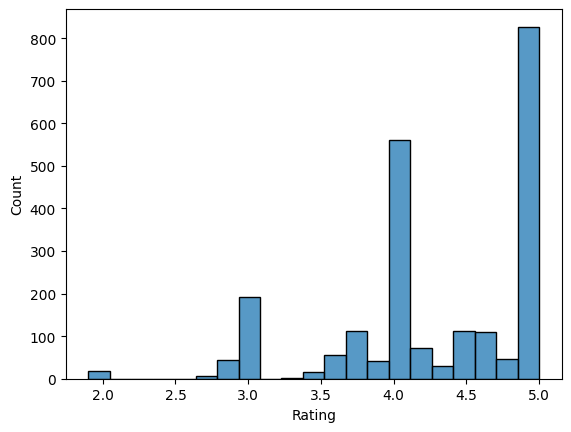

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing distribution of a numerical variable
sns.histplot(data['Rating'])
plt.show()

Not a lot of low ratings

This dataset has data on several vehicle models specifically focusing on tyres. The size, price, ratings... Let's explore.

Clean?

In [ ]:
data['Selling Price'] = data['Selling Price'].str.replace(',', '').astype(float)
data['Original Price'] = data['Original Price'].str.replace(',', '').astype(float)

In [ ]:
data.columns = data.columns.str.strip()
grouped_data = data.groupby('Brand').mean()[['Selling Price', 'Rating']]
print(grouped_data.sort_values(by='Selling Price'))

        Selling Price    Rating
Brand                          
Maruti    4724.982989  4.297598


<ipython-input-23-d2d367400a20>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('Brand').mean()[['Selling Price', 'Rating']]


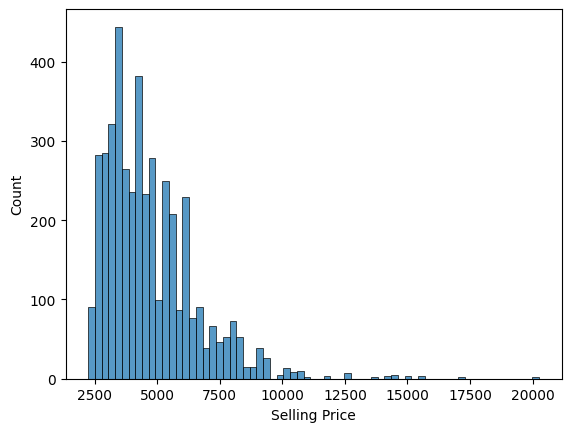

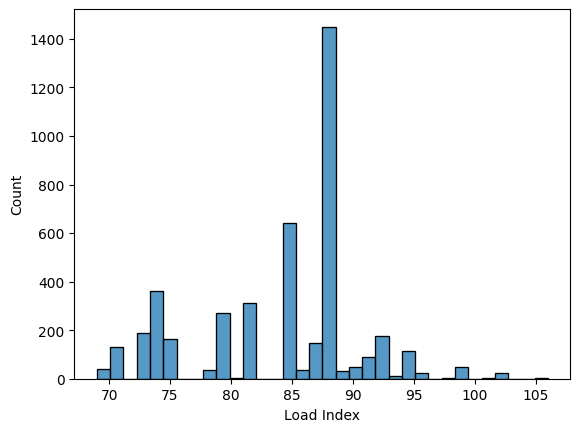

<ipython-input-27-63bf0ec53afb>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Brand').mean()[['Selling Price', 'Rating']].sort_values(by='Selling Price')


,Selling Price,Rating
Brand,,
Maruti,4724.982989,4.297598


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Selling Price'])
plt.show()

sns.histplot(data['Load Index'])
plt.show()

data.groupby('Brand').mean()[['Selling Price', 'Rating']].sort_values(by='Selling Price')

In [ ]:
print(data.columns)

Index(['Brand ', 'Model', 'Submodel', 'Tyre Brand', 'Serial No.', 'Type',
       'Load Index', 'Size', 'Selling Price', 'Original Price', 'Rating'],
      dtype='object')


In [ ]:
for col in ['Model', 'Submodel', 'Tyre Brand', 'Type']:
    print(data[col].value_counts())
    print('-' * 50)

Ciaz                         634
Ertiga                       350
Alto                         301
Swift Dzire                  242
Vitara Brezza                236
Alto K10                     224
Ritz                         222
Dzire                        216
Esteem                       215
New Swift (2018)             198
SX4                          195
Celerio                      184
Swift Dzire 2008             146
Omni                         120
Celerio X                    104
Zen Estilo                   100
A-Star                       100
Wagon R                       97
Eeco                          80
Swift                         75
Stingray                      60
Baleno                        55
Swift Deca                    48
Fronx                         35
Swift                         35
Grand Vitara                  26
Kizashi                       14
Gypsy                         12
800                            9
Zen                            6
Swift     

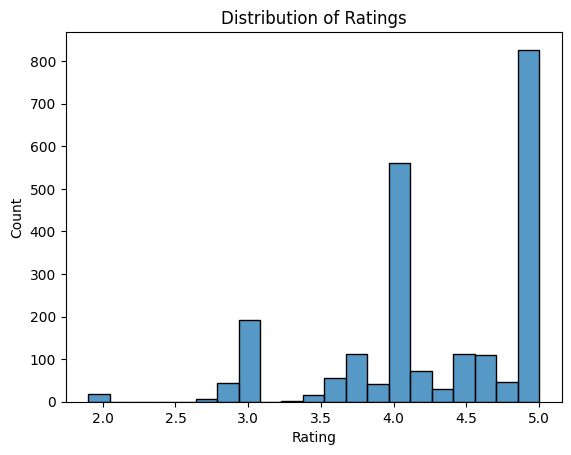

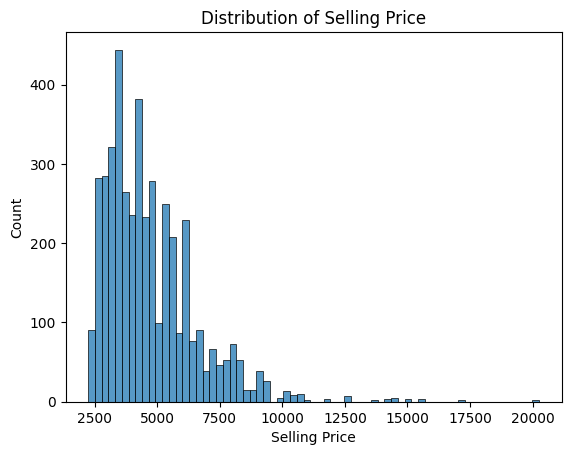

In [ ]:
sns.histplot(data['Rating'].dropna())
plt.title('Distribution of Ratings')
plt.show()

sns.histplot(data['Selling Price'])
plt.title('Distribution of Selling Price')
plt.show()

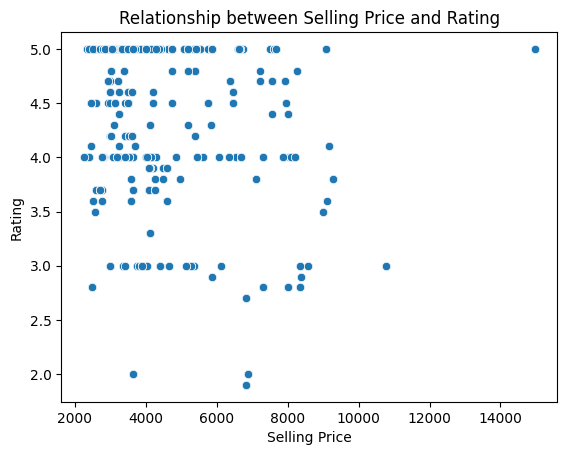

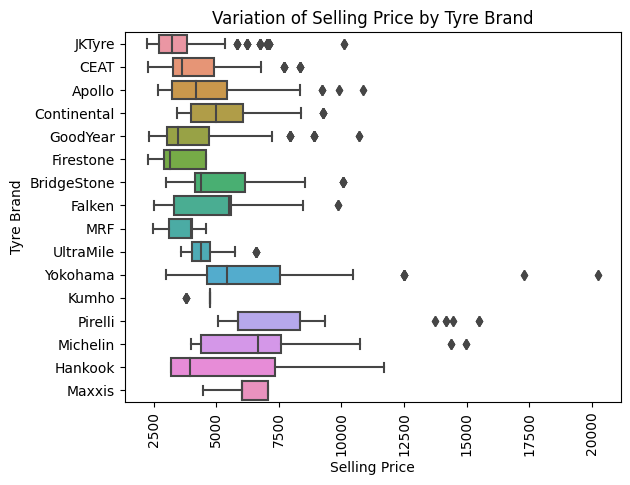

In [ ]:
sns.scatterplot(x='Selling Price', y='Rating', data=data)
plt.title('Relationship between Selling Price and Rating')
plt.show()

sns.boxplot(x='Selling Price', y='Tyre Brand', data=data)
plt.title('Variation of Selling Price by Tyre Brand')
plt.xticks(rotation=90)
plt.show()